In [1]:
import pandas as pd
import numpy as np
import os
import wfdb
import ast

# Load cleaned data

In [2]:
database = pd.read_pickle('data/database.pkl')
ecg_data = pd.read_pickle('data/ecg_data.pkl')

In [12]:
subclass_ label_map = {'NORM': 0,
                         'IMI': 1,
                         'STTC': 2,
                         'NST_': 3,
                         'LVH': 4,
                         'LAFB/LPFB': 5,
                         'IRBBB': 6,
                         'IVCD': 7,
                         'AMI': 8,
                         '_AVB': 9,
                         'ISCA': 10,
                         'ISCI': 11,
                         'CRBBB': 12,
                         'CLBBB': 13,
                         'RAO/RAE': 14,
                         'RVH': 15,
                         'ISC_': 16,
                         'ILBBB': 17,
                         'WPW': 18,
                         'LAO/LAE': 19,
                         'SEHYP': 20,
                         'LMI': 21,
                         'PMI': 22}

label_list = list(label_map.keys())

# Counts

## Class

In [9]:
count_df = pd.DataFrame(database['subclass'].value_counts())
count_df.insert(1, 'proportion', count_df['subclass']/sum(count_df['subclass']))

count_df

,subclass,proportion
NORM,9148,0.431897
MI,4121,0.194561
STTC,3327,0.157075
CD,3317,0.156603
HYP,1268,0.059865


## Subclass

In [33]:
count_df = pd.DataFrame(database['class'].value_counts())
count_df.insert(1, 'proportion', count_df['class']/sum(count_df['class']))
count_df.rename(index={v: k for k, v in label_map.items()}, inplace=True)

count_df

,class,proportion
NORM,9148,0.431897
IMI,2088,0.098579
AMI,1960,0.092536
STTC,1748,0.082527
LVH,1144,0.054011
LAFB/LPFB,911,0.043010
IRBBB,831,0.039233
CLBBB,527,0.024881
ISCA,526,0.024834
NST_,504,0.023795


# Displaying ECG Records

In [10]:
raw_data_path = 'C:\\Users\\burke\\Documents\\data\\ptb_xl'

## Normal Record

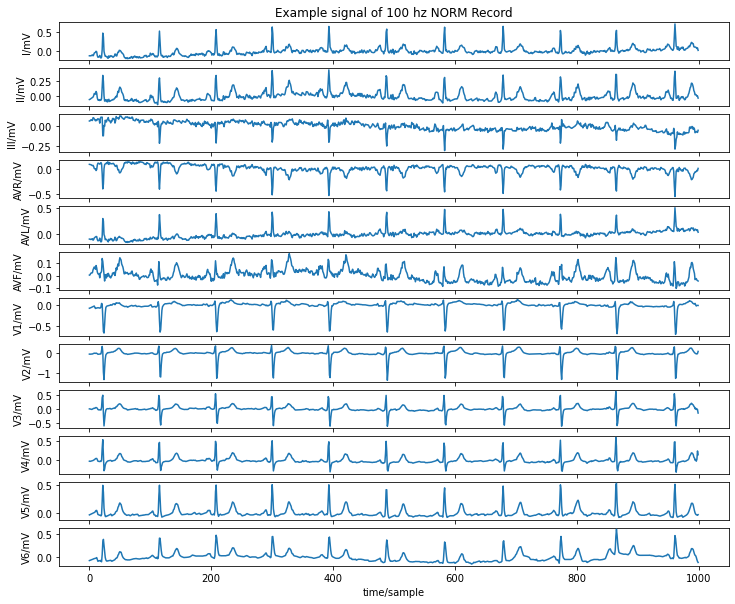

In [15]:
ex = database[database['subclass'] == 'NORM'].iloc[0]['filename_lr']

record100 = wfdb.rdrecord(os.path.join(raw_data_path,ex))
wfdb.plot_wfdb(record=record100, title='Example signal of 100 hz NORM Record', figsize=(12,10))

## MI Record

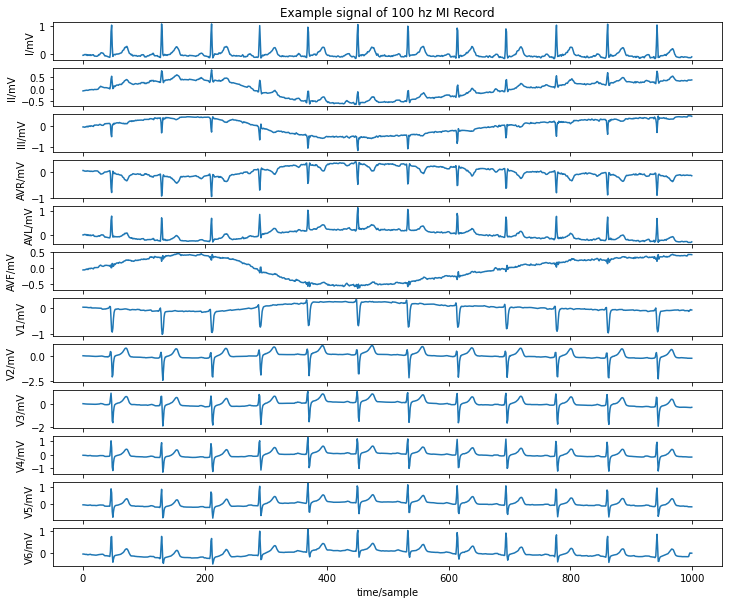

In [16]:
ex = database[database['subclass'] == 'MI'].iloc[0]['filename_lr']

record100 = wfdb.rdrecord(os.path.join(raw_data_path,ex))
wfdb.plot_wfdb(record=record100, title='Example signal of 100 hz MI Record', figsize=(12,10))